##### Import Necessary Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression

# 1. Load and Explore Diabetes Dataset

In [81]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target  # Features and target

df_diabetes = pd.DataFrame(X, columns=diabetes.feature_names)
df_diabetes['Target'] = y

print("Diabetes Dataset Sample:")
print(df_diabetes.head())
print("\nDataset Statistics:")
print(df_diabetes.describe())


Diabetes Dataset Sample:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Dataset Statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.76190

# 2. Define Utility Functions

In [82]:
def MSE(y_test,y_pred):
    errors = 0
    n = len(y_test)
    for i in range(n):
        errors += (y_test[i] - y_pred[i])**2
    return errors/n

# 3. Implement Gradient Descent Variants for Regression

In [83]:
def BGD(X_train,Y_train , alpha , iter):
    w = np.zeros(X_train.shape[1])
    b=0
    losses = []
    for i in range(iter):
        y_pred = np.dot(X_train, w) + b
        error = y_pred - Y_train
        dw = (2 / len(Y_train)) * np.dot(X_train.T, error)  
        db = (2 / len(Y_train)) * np.sum(error)
        w = w - alpha * dw
        b = b - alpha * db
        losses.append(MSE(Y_train, y_pred))
    return w,b, np.array(losses)

In [84]:
def SGD(X_train, Y_train, alpha, iterations):
    w = np.zeros(X_train.shape[1])  # Initialize weights
    b = 0
    losses = []
    for epoch in range(iterations):
        indices = np.random.permutation(len(X_train))  # Shuffle data
        X_train, Y_train = X_train[indices], Y_train[indices]

        for i in range(len(X_train)):
            xi = X_train[i]
            yi = Y_train[i]

            y_pred = np.dot(xi, w) + b
            error = y_pred - yi

            dw = 2 * xi * error
            db = 2 * error

            w -= alpha * dw
            b -= alpha * db
        losses.append(MSE(Y_train, np.dot(X_train, w) + b))

    return w, b, np.array(losses)

In [85]:
def MBGD(X_train, Y_train, alpha, iterations, batch_size):
    w = np.zeros(X_train.shape[1])  # Initialize weights
    b = 0
    losses = []
    for epoch in range(iterations):
        indices = np.random.permutation(len(X_train))  # Shuffle data
        X_train, Y_train = X_train[indices], Y_train[indices]

        for i in range(0, len(X_train), batch_size):
            x_batch = X_train[i:i + batch_size]
            y_batch = Y_train[i:i + batch_size]

            y_pred = np.dot(x_batch, w) + b
            error = y_pred - y_batch

            dw = (2 / batch_size) * np.dot(x_batch.T, error)
            db = (2 / batch_size) * np.sum(error)

            w -= alpha * dw
            b -= alpha * db
        losses.append(MSE(Y_train, np.dot(X_train, w) + b))
    return w, b, np.array(losses)


# 4. Train and Evaluate Regression Models

In [86]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

w_bgd, b_bgd, loss_bgd = BGD(X_train, Y_train, 0.001, 10000)
w_sgd, b_sgd, loss_sgd = SGD(X_train, Y_train, 0.001, 10000)
w_mbgd, b_mbgd, loss_mbgd = MBGD(X_train, Y_train, 0.001, 10000, 32)

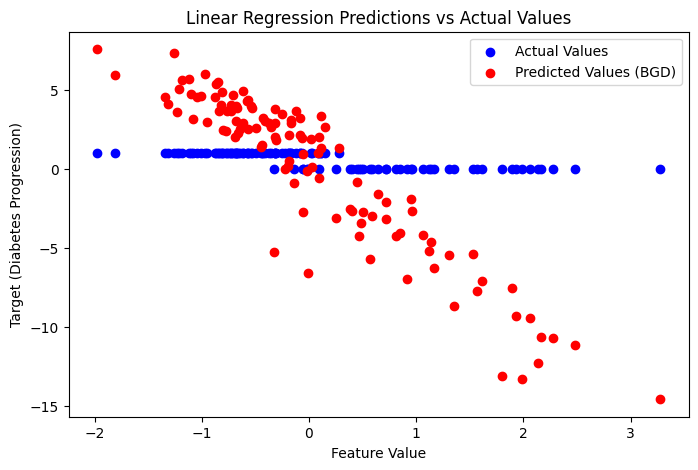

In [100]:
import matplotlib.pyplot as plt

# Choose one feature (e.g., BMI)
feature_index = 2  # Change this to any feature index (0-9)
X_feature = X_train[:, feature_index]

# Predictions using BGD model
y_pred_bgd = np.dot(X_test, w_bgd) + b_bgd

plt.figure(figsize=(8,5))
plt.scatter(X_test[:, feature_index], Y_test, color="blue", label="Actual Values")
plt.scatter(X_test[:, feature_index], y_pred_bgd, color="red", label="Predicted Values (BGD)")
plt.xlabel("Feature Value")
plt.ylabel("Target (Diabetes Progression)")
plt.title("Linear Regression Predictions vs Actual Values")
plt.legend()
plt.show()


#### Plot Loss Convergence

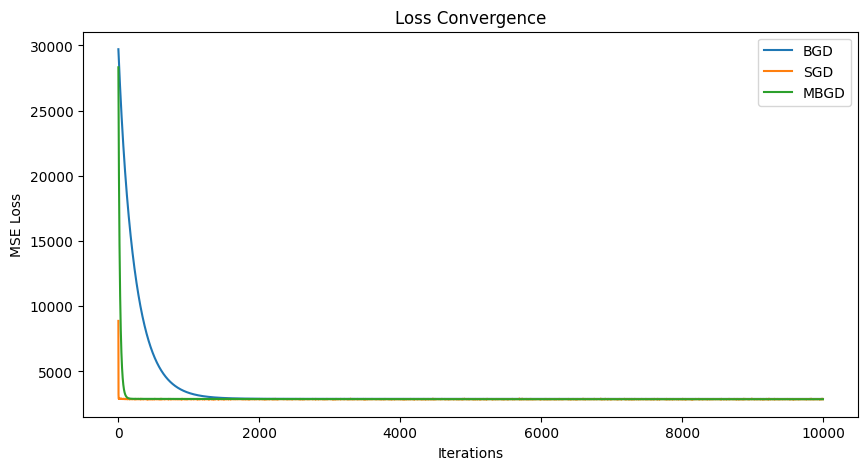

In [87]:
plt.figure(figsize=(10, 5)) 
plt.plot(loss_bgd, label='BGD')
plt.plot(loss_sgd, label='SGD')
plt.plot(loss_mbgd, label='MBGD')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Loss Convergence')
plt.legend()
plt.show()

In [88]:
# Evaluate Models
print("BGD MSE:", mean_squared_error(Y_test, np.dot(X_test, w_bgd) + b_bgd))
print("SGD MSE:", mean_squared_error(Y_test, np.dot(X_test, w_sgd) + b_sgd))
print("MBGD MSE:", mean_squared_error(Y_test, np.dot(X_test, w_mbgd) + b_mbgd))


BGD MSE: 2885.612700035657
SGD MSE: 2883.1823237664794
MBGD MSE: 2896.0349056847467


# 5. Load and Explore Breast Cancer Dataset

In [89]:
data = load_breast_cancer()
X, Y = data.data, data.target
df_cancer = pd.DataFrame(X, columns=data.feature_names)
df_cancer['Target'] = Y

print("Breast Cancer Dataset Sample:")
print(df_cancer.head())


Breast Cancer Dataset Sample:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter

# 6. Implement Logistic Regression with Gradient Descent

In [90]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [91]:
def cost_fun(X,Y,w,b):
    m = len(Y)
    y_hat = sigmoid(np.dot(X,w)+b)
    cost = -(1/m) * np.sum(Y * np.log(y_hat) + (1 - Y) * np.log(1 - y_hat))
    return cost

In [92]:
def compute_gradient(X,Y,w,b):
    m = len(Y)
    y_hat= sigmoid(np.dot(X,w) + b)
    dw = (1/m) * np.dot(X.T, (y_hat - Y))
    db = (1/m) * np.sum(y_hat - Y)
    return dw, db

In [93]:
def BGD(X,Y,alpha,iter):
    w = np.zeros(X.shape[1])
    b=0
    losses = []
    for i in range(iter):
        dw,db = compute_gradient(X,Y,w,b)
        w = w - alpha * dw
        b = b - alpha * db
        losses.append(cost_fun(X, Y, w, b))
    return w,b,np.array(losses)  

In [94]:
def SGD(X,Y,alpha,iter):
    m,n = X.shape
    w = np.zeros(n)
    b=0
    losses = []
    for i in range(iter):
        indices = np.random.permutation(m)
        X,Y = X[indices],Y[indices]
        for j in range(m):
            xi = X[j]
            yi = Y[j]
            y_hat = sigmoid(np.dot(xi,w)+b)
            error = y_hat-yi
            w -= alpha * error * xi
            b -= alpha * error
        losses.append(cost_fun(X,Y,w,b))    
    return w,b,np.array(losses)

In [95]:
def MBGD(X, y, alpha, epochs, batch_size):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    losses = []
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X, y = X[indices], y[indices]

        for i in range(0, m, batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            y_hat = sigmoid(np.dot(X_batch, w) + b)
            error = y_hat - y_batch

            w -= alpha * np.dot(X_batch.T, error) / batch_size
            b -= alpha * np.sum(error) / batch_size
        losses.append(cost_fun(X, y, w, b))
    return w, b,np.array(losses)

In [96]:
# Train models
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

w_bgd, b_bgd, loss_bgd = BGD(X_train, Y_train, 0.01, 1000)
w_sgd, b_sgd, loss_sgd = SGD(X_train, Y_train, 0.01, 1000)
w_mbgd, b_mbgd, loss_mbgd = MBGD(X_train, Y_train, 0.01, 1000, 16)

y_pred_bgd = sigmoid(np.dot(X_test, w_bgd) + b_bgd) >= 0.5
y_pred_sgd = sigmoid(np.dot(X_test, w_sgd) + b_sgd) >= 0.5
y_pred_mbgd = sigmoid(np.dot(X_test, w_mbgd) + b_mbgd) >= 0.5

acc_bgd = accuracy_score(Y_test, y_pred_bgd)
acc_sgd = accuracy_score(Y_test, y_pred_sgd)
acc_mbgd = accuracy_score(Y_test, y_pred_mbgd)

print("BGD Accuracy:", acc_bgd)
print("SGD Accuracy:", acc_sgd)
print("MBGD Accuracy:", acc_mbgd)


BGD Accuracy: 0.9824561403508771
SGD Accuracy: 0.9736842105263158
MBGD Accuracy: 0.9824561403508771


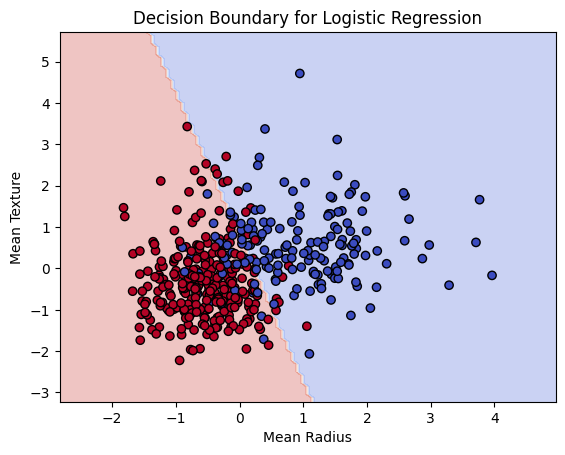

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Select two features for visualization
feature_1 = 0  # Mean Radius
feature_2 = 1  # Mean Texture
X_vis = X_train[:, [feature_1, feature_2]]

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_vis, Y_train)

# Generate grid for contour plot
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict on the grid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=Y_train, edgecolor="k", cmap=plt.cm.coolwarm)
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.title("Decision Boundary for Logistic Regression")
plt.show()


#### Plot Loss Convergence

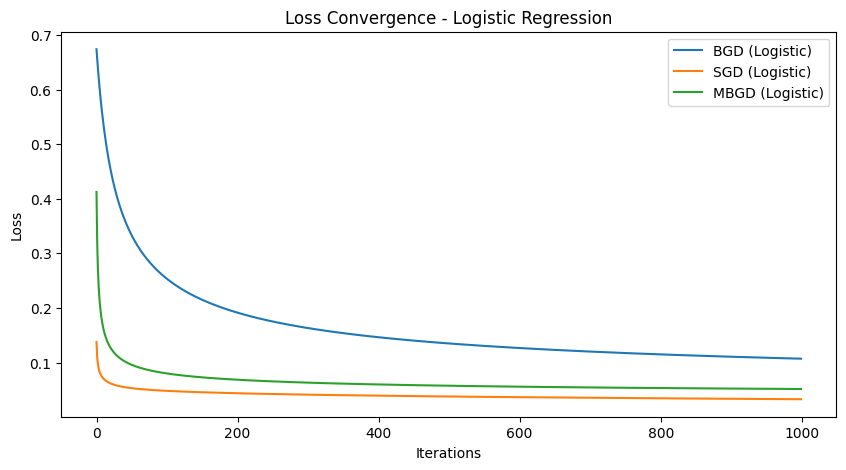

In [97]:
plt.figure(figsize=(10, 5))
plt.plot(loss_bgd, label="BGD (Logistic)")
plt.plot(loss_sgd, label="SGD (Logistic)")
plt.plot(loss_mbgd, label="MBGD (Logistic)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Convergence - Logistic Regression")
plt.legend()
plt.show()